
# 📘 Statistika 1 – Pradinė duomenų statistinė analizė (EDA)  




## ✅ Planas
1. Bibliotekos ir nustatymai  
2. Duomenų įkėlimas (Titanic → jei nepavyks, `sklearn` Iris)  
3. Pirmasis žvilgsnis: formos, tipai, trūkstamos reikšmės  
4. Aprašomoji statistika: centrinė tendencija ir išsibarstymas  
5. Skirstinių forma: histogramų ir boxplot analizė  
6. Pasvirimas (skew), „kumpis“ (kurtosis)  
7. Kategorinių kintamųjų suvestinės  
8. Koreliacijos (jei yra ≥2 skaitiniai kintamieji)  
9. (Titanic) Išvestinis požymis `Fare_per_person` ir palyginimas


## 1) Bibliotekos ir nustatymai

In [4]:
import seaborn as sns
sns.get_dataset_names()
# sns.load_dataset("seaice")


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

| Duomenų rinkinys | Aprašymas  |
|------------------|----------------------------|
| **anagrams** | Eksperimentiniai duomenys apie anagramų sprendimo laiką skirtingomis sąlygomis. Naudojamas variacijos ir sąlygų poveikio analizei. |
| **anscombe** | Klasikinis Anscombe ketvertukas – keturi skirtingi duomenų rinkiniai su vienodomis santraukos statistikomis, bet skirtingomis pasiskirstymo formomis. Puikiai tinka vizualizacijos svarbai demonstruoti. |
| **attention** | Eksperimentiniai duomenys apie dėmesio reakcijos laiką skirtingose sąlygose. Naudojamas ANOVA ir pakartotinių matavimų analizėms. |
| **brain_networks** | Duomenys apie smegenų ryšių (tinklų) struktūrą, naudingi tinklų vizualizacijai ir analizėms. |
| **car_crashes** | JAV automobilių avarijų statistika pagal valstijas, su vairavimo, alkoholio vartojimo ir saugumo rodikliais. Naudojamas regresijai ir koreliacijoms. |
| **diamonds** | Informacija apie deimantų kainas ir savybes (karatai, spalva, švarumas, pjūvio kokybė). Naudojamas regresijai ir kategorijų analizei. |
| **dots** | Eksperimentiniai duomenys apie judančių taškų suvokimą, matuojant reakcijos laiką ir teisingumą. |
| **dowjones** | „Dow Jones Industrial Average“ akcijų indeksų pokyčiai laike. Naudojamas laiko eilučių analizei. |
| **exercise** | Duomenys apie fizinius pratimus, jų trukmę ir intensyvumą, naudingi kategorinei ir laiko analizei. |
| **flights** | Mėnesinių skrydžių keleivių skaičius nuo 1949 iki 1960 m. Naudojamas laiko eilučių ir šilumos žemėlapių vizualizacijoms. |
| **fmri** | Funkcinio magnetinio rezonanso (fMRI) duomenys, rodantys smegenų aktyvumą laike skirtingose sąlygose. |
| **geyser** | „Old Faithful“ geizerio išsiveržimų trukmės ir laukimo laikas tarp jų. Klasikinis dviejų kintamųjų sklaidos pavyzdys. |
| **glue** | Eksperimentiniai duomenys apie klijų sukibimo stiprumą skirtingomis sąlygomis. Naudojamas ANOVA ir t-testams. |
| **healthexp** | Sveikatos išlaidų, gyvenimo trukmės ir BVP duomenys pagal šalis bei metus. Naudojamas koreliacijoms ir regresijoms. |
| **iris** | Klasikinis gėlių (irisų) duomenų rinkinys su 4 požymiais ir 3 rūšimis. Naudojamas klasifikacijai ir vizualizacijoms. |
| **mpg** | Automobilių degalų sąnaudų (miles per gallon) duomenys su variklio, svorio ir metų informacija. Naudojamas regresijai. |
| **penguins** | Pingvinų matavimai (snapo ilgis, svoris, rūšis) iš Antarktidos salų. Naudojamas klasifikacijai ir EDA. |
| **planets** | Atrastų egzoplanetų savybės (masė, orbitos periodas, atradimo metodas). Naudojamas moksliniams duomenims analizuoti. |
| **seaice** | Arkties jūros ledo ploto pokyčiai laike. Naudojamas klimato kaitos vizualizacijoms. |
| **taxis** | Niujorko taksi kelionių duomenys su laiko, kainos ir maršruto informacija. Naudojamas geografiniams ir laiko analizių pavyzdžiams. |
| **tips** | Arbatpinigių duomenys restorane su sąskaitos suma, aptarnavimo diena ir padavėjo lytimi. Naudojamas regresijai ir kategorinei analizei. |
| **titanic** | „Titanic“ keleivių duomenys su išgyvenimo, bilieto klasės, amžiaus ir kitais požymiais. Naudojamas klasifikacijai ir EDA. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

pd.set_option('display.precision', 3)
pd.set_option('display.max_columns', 50)
sns.set_theme()



**Paaiškinimas:**  
- Įkeliame pagrindines bibliotekas.  
- Nustatome `pandas` rodymo parametrus, kad lentelės būtų patogesnės.  
- `sns.set_theme()` suteikia tvarkingą numatytą stilių grafikams.


## 2) Duomenų įkėlimas: Titanic 

In [2]:
# https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset

In [ ]:
# titanic = pd.read_read_CSV(titanic.csv) jei noretume is failo atsidaryti

In [9]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [5]:

# Įkeliamas Titanic duomenų rinkinys
target_col = None

try:
    import seaborn as sns
    titanic = sns.load_dataset("titanic")
    titanic.head()
    # Galimas tikslinis kintamasis Titanic rinkinyje
    target_col = "Survived" if "Survived" in titanic.columns else None
except Exception as e:
    print("dataset not found")
    



In [68]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True




- Atvaizduojame pirmąsias eilutes, kad pamatytume stulpelius ir formatą.


In [10]:
titanic.shape

(891, 15)

In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Titanic (`sns.load_dataset("titanic")`) – stulpelių aprašymai

| Stulpelis        | Tipas          | Aprašymas |
|------------------|----------------|-----------|
| `survived`       | int (0/1)      | Išgyvenimas (0 = ne, 1 = taip). |
| `pclass`         | int (1/2/3)    | Bilieto klasė (1 – I klasė, 2 – II, 3 – III). |
| `sex`            | category       | Lytis (`male`, `female`). |
| `age`            | float          | Amžius metais (gali būti `NaN`). |
| `sibsp`          | int            | Laive esantys broliai/seserys ir sutuoktiniai (skaičius). |
| `parch`          | int            | Laive esantys tėvai ir vaikai (skaičius). |
| `fare`           | float          | Bilieto kaina. |
| `embarked`       | category       | Įlaipinimo uostas (`C` – Cherbourg, `Q` – Queenstown, `S` – Southampton). |
| `class`          | category       | Keleivio klasė tekstu (`First`, `Second`, `Third`) – atitinka `pclass`. |
| `who`            | category       | Asmens tipas pagal amžių ir lytį (`man`, `woman`, `child`). |
| `adult_male`     | bool           | Ar suaugęs vyras (`True` jei `sex = male` ir `age ≥ 18`). |
| `deck`           | category       | Denio raidė (išgauta iš kabinos; daug `NaN`). |
| `embark_town`    | category       | Įlaipinimo miesto pavadinimas (`Cherbourg`, `Queenstown`, `Southampton`). |
| `alive`          | category       | Išgyvenimo būsena tekstu (`yes`/`no`) – atitinka `survived`. |
| `alone`          | bool           | Ar keliavo be šeimos (nėra `sibsp` ir `parch` drauge). |

**Pastabos:**
- `class` ir `pclass` yra to paties požymio skirtingos reprezentacijos (tekstu vs. skaičiumi).
- `who`, `adult_male`, `alive`, `alone` – **išvestiniai** patogumui.


## 3) Pirmasis žvilgsnis: forma, tipai, trūkstamos reikšmės

In [ ]:

rows, cols = titanic.shape
print(f"Eilučių skaičius: {rows} | Stulpelių skaičius: {cols}\n")

print("Duomenų tipai:")
print(titanic.dtypes, "\n")

print("Trūkstamos reikšmės (skaičius kiekviename stulpelyje):")
titanic.isnull().sum() # galima rasyti .isna().sum()


Eilučių skaičius: 891 | Stulpelių skaičius: 15

Duomenų tipai:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object 

Trūkstamos reikšmės (skaičius kiekviename stulpelyje):


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


**Paaiškinimas:**  
- `shape` parodo duomenų mastą.  
- `dtypes` padeda apsispręsti dėl apdorojimo: skaitiniai/kategoriniai.  
- `isna().sum()` padeda pamatyti, ar reikia tvarkyti trūkstamas reikšmes.


## 4) Aprašomoji statistika (skaitiniams stulpeliams)

In [13]:

numeric_cols = titanic.select_dtypes(include=[np.number]).columns.tolist()
desc = titanic[numeric_cols].describe().transpose()
desc


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.384,0.487,0.00,0.000,0.000,1.0,1.000
pclass,891.0,2.309,0.836,1.00,2.000,3.000,3.0,3.000
age,714.0,29.699,14.526,0.42,20.125,28.000,38.0,80.000
sibsp,891.0,0.523,1.103,0.00,0.000,0.000,1.0,8.000
parch,891.0,0.382,0.806,0.00,0.000,0.000,0.0,6.000
fare,891.0,32.204,49.693,0.00,7.910,14.454,31.0,512.329



**Paaiškinimas:**  
- `describe()` pateikia pagrindinius rodiklius: **vidurkį, std, kvartilius, min, max**.  
- Iš to galime spėti, ar galimi outlier'iai, ar skirstinys gali būti pasviręs.


## 5) Skirstinių forma: histogramos ir boxplot

In [17]:
titanic[titanic['age']< 0.43]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,0.42,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.42,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0.42,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.42,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.42,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.42,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0.42,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,0.42,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0.42,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True


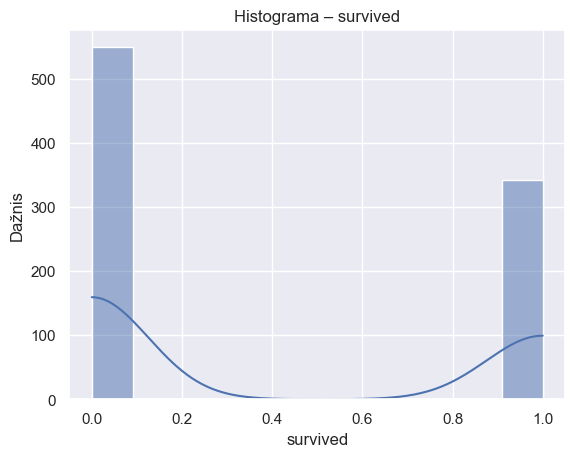

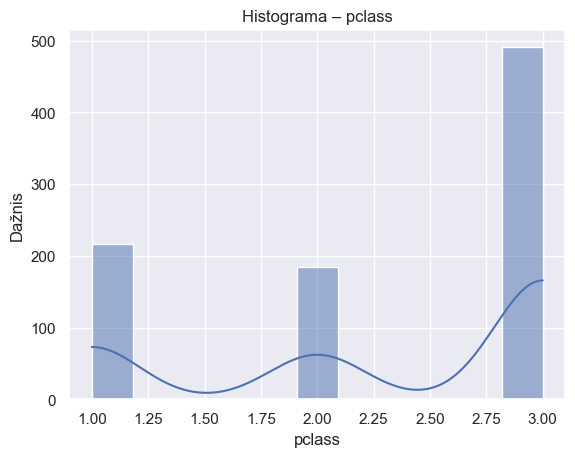

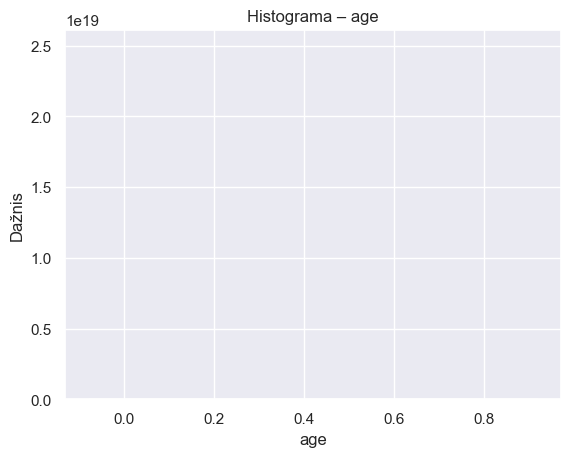

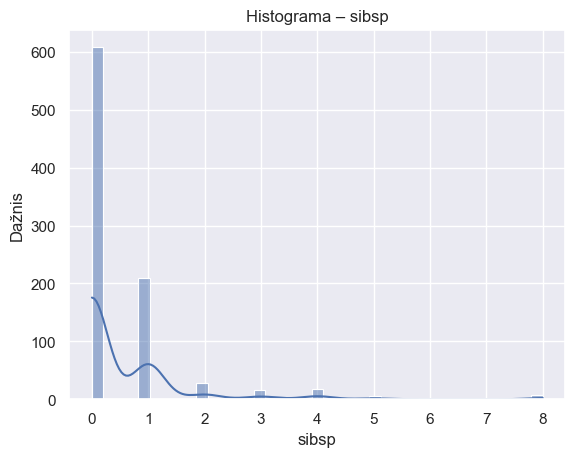

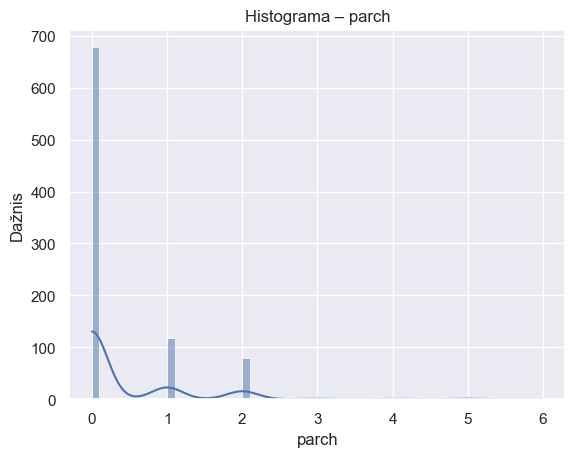

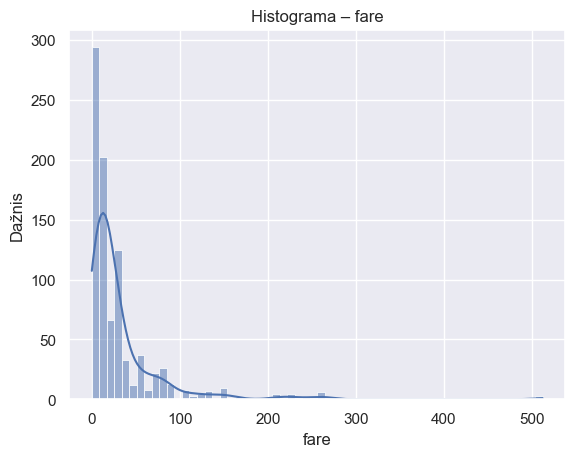

In [18]:

# Nubraižysime histogramas visiems skaitiniams stulpeliams
for c in numeric_cols:
    plt.figure()
    sns.histplot(titanic[c].dropna(), kde=True)
    plt.title(f"Histograma – {c}")
    plt.xlabel(c)
    plt.ylabel("Dažnis")
    plt.show()


In [19]:
titanic[titanic['fare'] < 1].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,0.42,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,0.42,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,0.42,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,0.42,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,0.42,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True


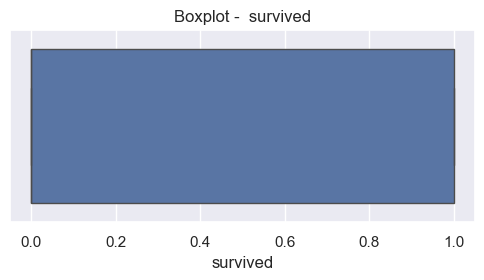

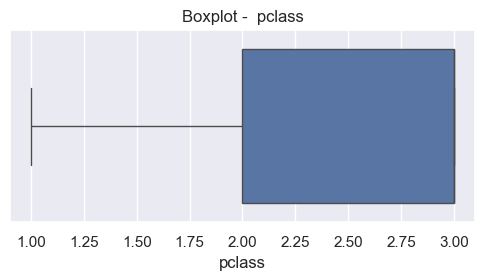

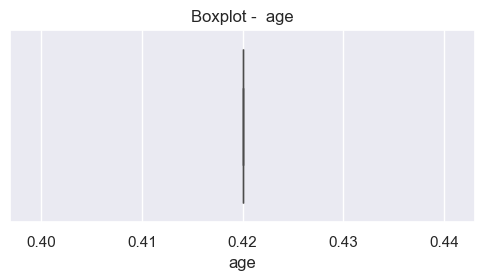

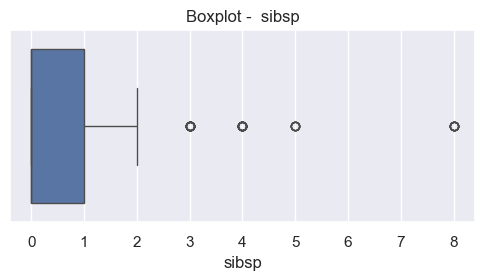

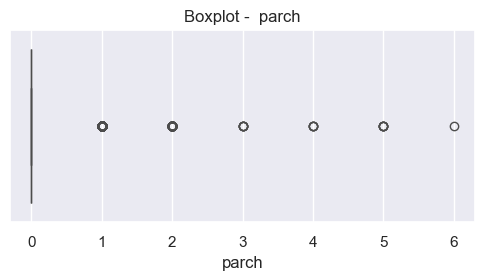

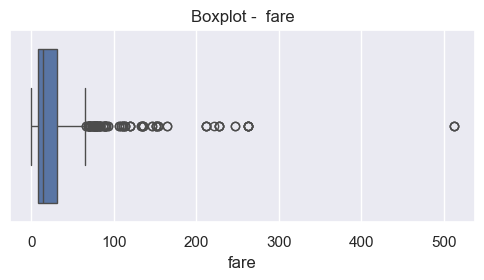

In [21]:

# Nubraižysime boxplot visiems skaitiniams stulpeliams
for c in numeric_cols:
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=titanic[c].dropna())
    plt.title(f"Boxplot -  {c}")
    plt.xlabel(c)
    plt.show()



**Paaiškinimas:**  
- **Histogramoje** žiūrime į simetriją ir uodegas.  
- **Boxplot** parodo medianą, kvartilius, galimus outlier'ius (taškai už 1.5×IQR).  
- Jei uodega ilga į dešinę – skirstinys teigiamai pasviręs.


# Outlier'iai pagal 1.5×IQR kriterijų

## 1️⃣ Kas yra IQR?
**IQR (Interkvartilinis diapazonas)** = **Q3 − Q1**

- **Q1** (pirmasis kvartilis) – reikšmė, žemiau kurios yra 25 % duomenų.
- **Q3** (trečiasis kvartilis) – reikšmė, žemiau kurios yra 75 % duomenų.

## 2️⃣ 1.5×IQR riba
Potencialūs outlier'iai apibrėžiami pagal ribas:
- **Apatinė riba** = Q1 − (1.5 × IQR)
- **Viršutinė riba** = Q3 + (1.5 × IQR)

Jei reikšmė < apatinės ribos → galimas mažas outlier’is.  
Jei reikšmė > viršutinės ribos → galimas didelis outlier’is.

---

## 3️⃣ Pavyzdys su skaičiavimais
Turime duomenis:
[5, 7, 8, 8, 9, 10, 10, 10, 11, 12, 40]

**Žingsniai:**
1. Surikiuojame duomenis (jau surikiuoti).
2. Randame **Q1** – 25% percentilis:  
   Q1 = 8  
3. Randame **Q3** – 75% percentilis:  
   Q3 = 11  
4. Skaičiuojame **IQR**:  
   IQR = Q3 − Q1 = 11 − 8 = 3  
5. Skaičiuojame 1.5×IQR:  
   1.5 × IQR = 1.5 × 3 = 4.5  
6. Apskaičiuojame ribas:  
   Apatinė riba = 8 − 4.5 = 3.5  
   Viršutinė riba = 11 + 4.5 = 15.5  
7. Patikriname duomenis:  
   - < 3.5 → nėra mažesnių reikšmių → mažų outlier’ių nėra.  
   - > 15.5 → 40 yra outlier’is.

---

## 4️⃣ Kodėl būtent 1.5?
- Tai empiriškai parinktas daugiklis, naudojamas Tukey boxplot metodikoje.
- Balansuoja tarp jautrumo ir tolerancijos: aptinka neįprastai dideles/mažas reikšmes, bet neišmeta per daug duomenų.

# Kaip apskaičiuojame percentilius

## Q1 (25-asis procentilis)
- Q1 = reikšmė, žemiau kurios yra 25 % visų duomenų.
- Mūsų pavyzdyje:
  - N = 11 reikšmių.
  - 25% iš 11 = 0.25 × (N+1) = 0.25 × 12 = 3 → trečia reikšmė surikiuotoje eilėje.
  - Trečia reikšmė yra **8** → Q1 = 8.

---

## 3. Q3 (75-asis procentilis)
- Q3 = reikšmė, žemiau kurios yra 75 % visų duomenų.
- Mūsų pavyzdyje:
  - 75% iš 11 = 0.75 × (N+1) = 0.75 × 12 = 9 → devinta reikšmė.
  - Devinta reikšmė yra **11** → Q3 = 11.

---

💡 **Pastaba:**  
Kai skaičiuojame percentilį ir indekso vieta nėra sveikas skaičius, imame **interpoliuotą** reikšmę tarp dviejų artimiausių duomenų.  
Pvz., `np.percentile(data, 25)` automatiškai atlieka interpolaciją, jei reikia.

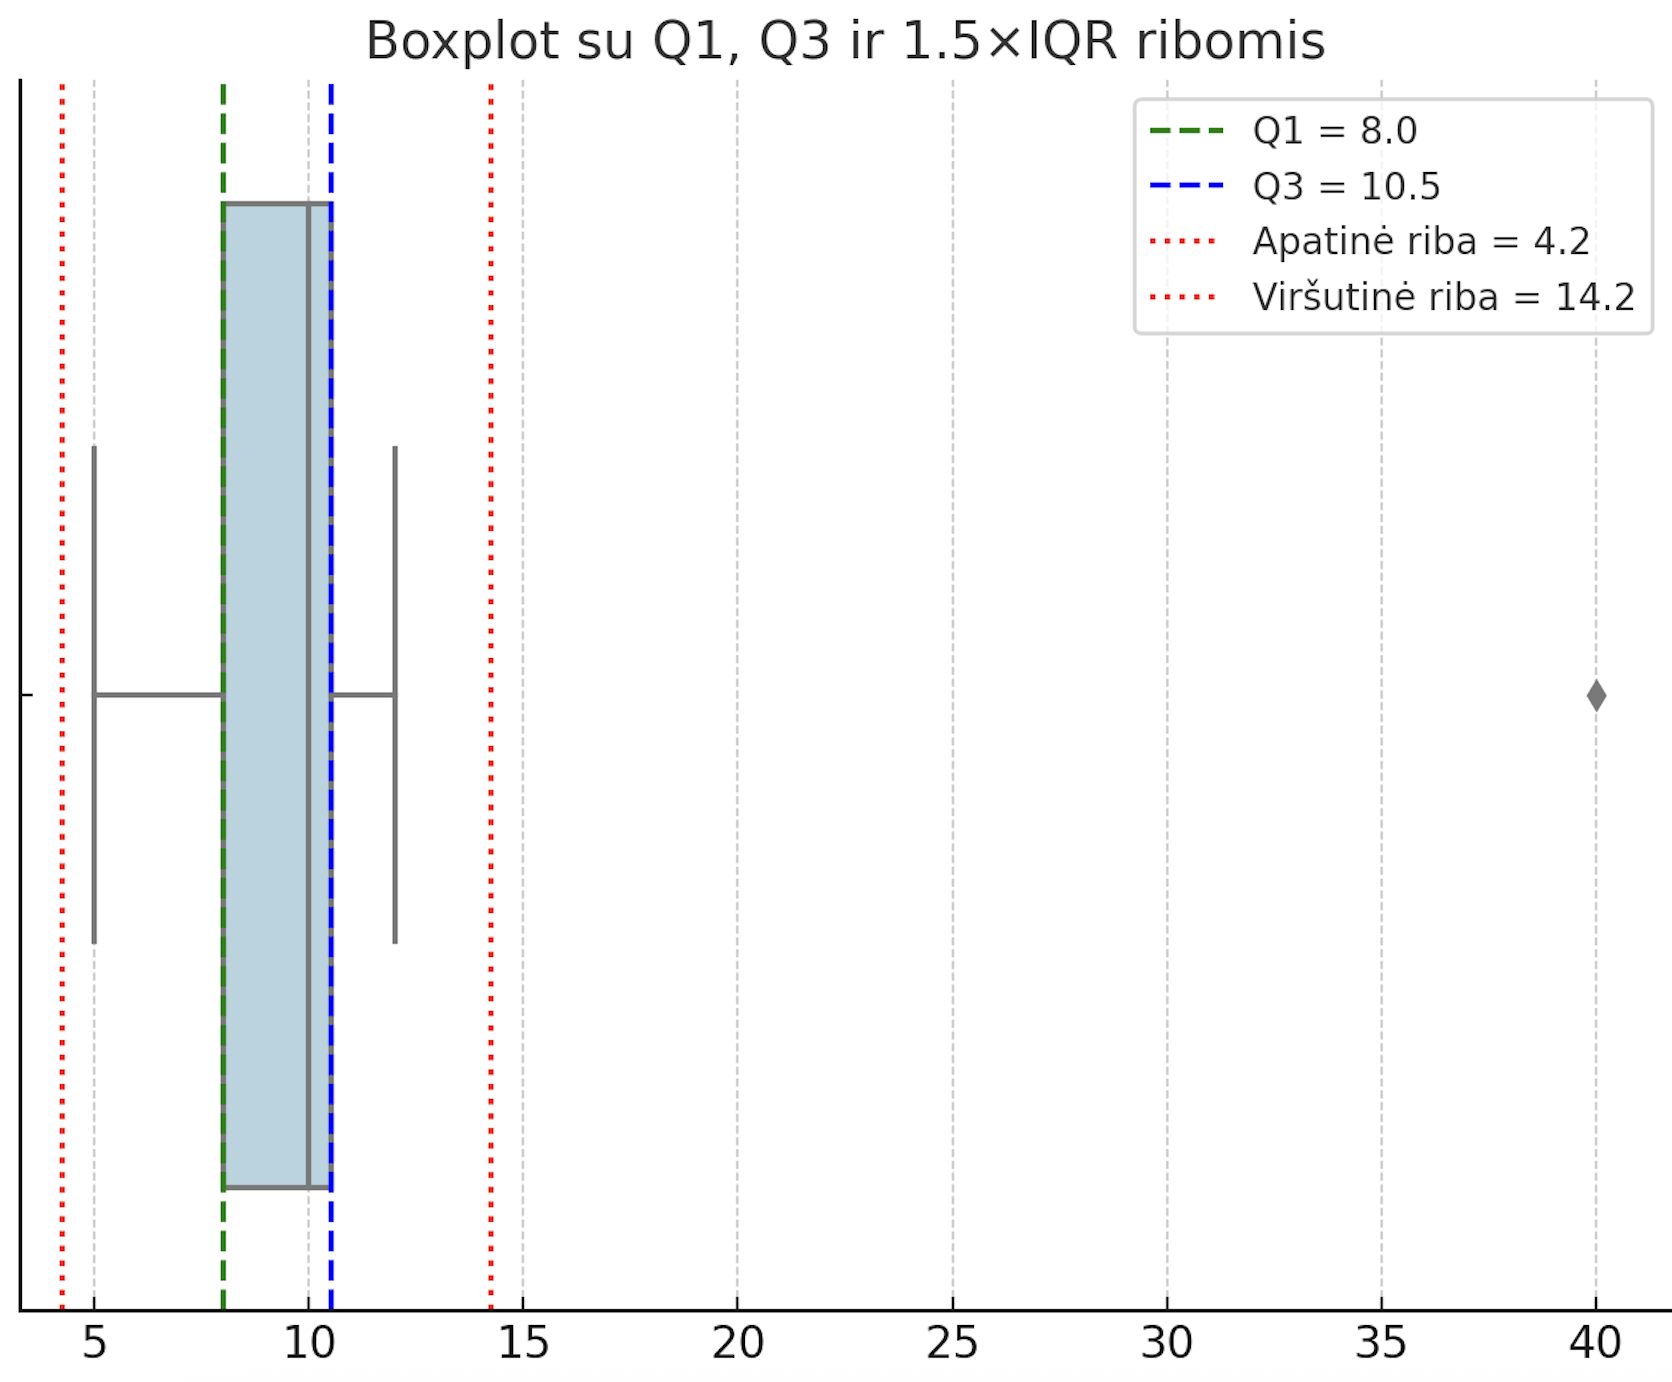

## 6) Pasvirimas (skew) ir viršūnės smailumas (ekcesas), (kurtosis)

In [22]:

sk_shape = []
for c in numeric_cols:
    vals = titanic[c].dropna().values
    if len(vals) > 1:
        sk_shape.append({
            "kintamasis": c,
            "skew": float(skew(vals, bias=False)),
            "kurtosis": float(kurtosis(vals, bias=False))
        })
shape_titanic = pd.DataFrame(sk_shape)
shape_titanic


C:\Users\krist\AppData\Local\Temp\ipykernel_6456\2781099741.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "skew": float(skew(vals, bias=False)),
C:\Users\krist\AppData\Local\Temp\ipykernel_6456\2781099741.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "kurtosis": float(kurtosis(vals, bias=False))


,kintamasis,skew,kurtosis
0,survived,0.479,-1.775
1,pclass,-0.631,-1.280
2,age,NaN,NaN
3,sibsp,3.695,17.880
4,parch,2.749,9.778
5,fare,4.787,33.398



**Paaiškinimas:**  
- **Skew > 0** → teigiamai pasviręs (ilgesnė dešinė uodega). **Skew < 0** → neigiamai pasviręs.  
- **Kurtosis > 0** → statesnė viršūnė ir storesnės uodegos nei normalioji kreivė.


## 7) Kategorinių kintamųjų suvestinės

In [28]:
embarked_total = titanic.groupby(by='sex')
embarked_total = embarked_total.size().reset_index(name='count')
embarked_total

,sex,count
0,female,314
1,male,577


In [ ]:

cat_cols = titanic.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
summary = {}
for c in cat_cols:
    vc = titanic[c].value_counts(dropna=False).to_frame("count")
    vc["proportion"] = (vc["count"] / len(titanic)).round(3)
    summary[c] = vc
summary



{'sex':         count  proportion
 sex                      
 male      577       0.648
 female    314       0.352,
 'embarked':           count  proportion
 embarked                   
 S           644       0.723
 C           168       0.189
 Q            77       0.086
 NaN           2       0.002,
 'class':         count  proportion
 class                    
 Third     491       0.551
 First     216       0.242
 Second    184       0.207,
 'who':        count  proportion
 who                     
 man      537       0.603
 woman    271       0.304
 child     83       0.093,
 'adult_male':             count  proportion
 adult_male                   
 True          537       0.603
 False         354       0.397,
 'deck':       count  proportion
 deck                   
 NaN     688       0.772
 C        59       0.066
 B        47       0.053
 D        33       0.037
 E        32       0.036
 A        15       0.017
 F        13       0.015
 G         4       0.004,
 'embark_town': 


**Paaiškinimas:**  
- `value_counts()` padeda pamatyti kategorijų pasiskirstymą.  
- Naudinga vertinant klasės disbalansą (pvz., klasifikacijoje su `Survived`).


## 8) Koreliacijos tarp skaitinių kintamųjų

,survived,pclass,age,sibsp,parch,fare
survived,1.000,-0.338,-0.077,-0.035,0.082,0.257
pclass,-0.338,1.000,-0.369,0.083,0.018,-0.549
age,-0.077,-0.369,1.000,-0.308,-0.189,0.096
sibsp,-0.035,0.083,-0.308,1.000,0.415,0.160
parch,0.082,0.018,-0.189,0.415,1.000,0.216
fare,0.257,-0.549,0.096,0.160,0.216,1.000


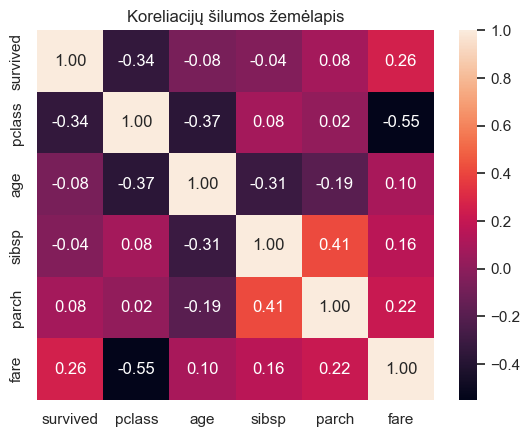

In [76]:

if len(numeric_cols) >= 2:
    corr = titanic[numeric_cols].corr(numeric_only=True)
    display(corr)
    plt.figure()
    sns.heatmap(corr, annot=True, fmt=".2f")
    plt.title("Koreliacijų šilumos žemėlapis")
    plt.show()
else:
    print("Koreliacijai nepakanka skaitinių kintamųjų.")



**Paaiškinimas:**  
- Koreliacija matuoja **tiesinį ryšį** tarp skaitinių kintamųjų (nuo -1 iki 1).  
- **Didelė |r|** gali reikšti multikolinearumą (svarbu regresijoje).
